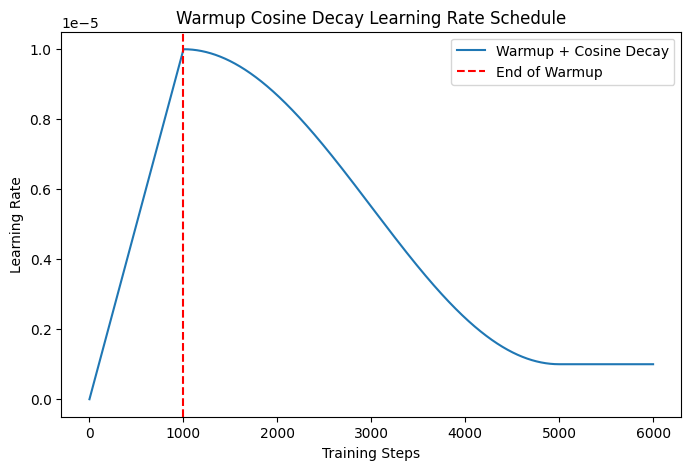

In [6]:
import jax.numpy as jnp
import matplotlib.pyplot as plt
import optax

# Define schedule parameters
init_value = 0  # Starting LR
peak_value = 1e-5   # Peak LR after warmup
warmup_steps = 1000 # Number of warm-up steps
decay_steps = 5000  # Number of decay steps
end_value = 1e-6  # Final LR after decay

# Create learning rate schedule
lr_schedule = optax.schedules.warmup_cosine_decay_schedule(
    init_value=init_value,
    peak_value=peak_value,
    warmup_steps=warmup_steps,
    decay_steps=decay_steps,
    end_value=end_value
)

# Generate learning rates for visualization
steps = jnp.arange(warmup_steps + decay_steps)
learning_rates = jnp.array([lr_schedule(step) for step in steps])

# Plot learning rate schedule
plt.figure(figsize=(8, 5))
plt.plot(steps, learning_rates, label="Warmup + Cosine Decay")
plt.axvline(warmup_steps, color='r', linestyle='--', label="End of Warmup")
plt.xlabel("Training Steps")
plt.ylabel("Learning Rate")
plt.title("Warmup Cosine Decay Learning Rate Schedule")
plt.legend()
plt.show()